In [1]:
!pip install git+https://github.com/philipperemy/keras-tcn.git@master --upgrade --quiet


  Preparing metadata (setup.py) ... done


In [3]:
from tcn import TCN
print("✅ TCN importado com sucesso!")


✅ TCN importado com sucesso!


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from tcn import TCN
from google.colab import files  # Import the 'files' object from google.colab




In [5]:
# 📁 Carregar Dados - Foi ultilizado o dataset já ajustado em relação aos outliers
# =========================================
uploaded = files.upload()
df_original = pd.read_excel(next(iter(uploaded)))

Saving OrganizationType_Count_v4_semajust (1)_tratado_v2.xlsx to OrganizationType_Count_v4_semajust (1)_tratado_v2.xlsx


In [6]:
# Faz uma cópia do DataFrame original para evitar alterações permanentes
df = df_original.copy()

# Função para ajustar datas incompletas (ano ou ano/mês) e tratá-las como datas válidas
def ajustar_datas(data_str):
    try:
        if len(data_str) == 4:  # Somente ano (ex: '2005') → assume '01-01'
            return pd.NaT
        elif len(data_str) == 7:  # Ano e mês (ex: '2005-09') → assume dia '01'
            return pd.Timestamp(data_str + '-01')
        else:  # Data completa (ex: '2005-09-22')
            return pd.Timestamp(data_str)
    except:
        return pd.NaT  # Retorna valor nulo se a conversão falhar

# Aplica a função de ajuste à coluna de datas
df['Date Breach'] = df['Date Breach'].apply(ajustar_datas)

# Mostra 20 linhas aleatórias do DataFrame
print(df.sample(20))

# Converte a coluna para o tipo datetime do Pandas
df.loc[:, 'Date Breach'] = pd.to_datetime(df['Date Breach'])

# Define a coluna de data como índice do DataFrame
df.set_index('Date Breach', inplace=True)

# Garante que o índice está em formato datetime (reforço de segurança)
df.index = pd.to_datetime(df.index)

# Mostra 20 linhas aleatórias do DataFrame
print(df.sample(20))

# Filtra para manter apenas dados antes de 2024
df = df[df.index < pd.to_datetime('2024-01-01')]
#df = df[(df.index >= pd.to_datetime('2010-01-01')) & (df.index < pd.to_datetime('2024-01-01'))]


# Extrai a série temporal do setor atual, com frequência mensal
#serie = df[[setor]].resample('ME').sum().fillna(0)

serie = df.resample('ME').sum().fillna(0)
print("\n📊 Série temporal para TODOS os setores:")
print(serie)



     Date Breach  BSF  BSO  BSR  EDU  GOV  MED  NGO  UNKN  Total Geral
782   2013-10-02  NaN  NaN  NaN  NaN  NaN  NaN  1.0   1.0          2.0
612   2013-01-07  NaN  NaN  NaN  NaN  NaN  4.0  NaN   NaN          4.0
1089  2014-10-23  NaN  NaN  NaN  NaN  NaN  1.0  NaN   1.0          2.0
3142  2020-09-19  2.0  2.0  NaN  NaN  NaN  NaN  NaN   1.0          5.0
2455  2018-10-25  1.0  5.0  NaN  1.0  NaN  2.0  NaN   3.0         12.0
3734  2022-04-19  NaN  4.0  NaN  1.0  NaN  2.0  NaN   4.0         11.0
2428  2018-09-27  2.0  3.0  3.0  NaN  NaN  1.0  NaN   2.0         11.0
494   2012-04-24  NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN          1.0
3082  2020-07-23  NaN  2.0  NaN  NaN  NaN  2.0  1.0   5.0         10.0
4060  2023-03-04  NaN  1.0  1.0  2.0  NaN  2.0  NaN   2.0          8.0
1969  2017-06-04  5.0  NaN  NaN  NaN  1.0  NaN  NaN   2.0          8.0
2382  2018-08-09  NaN  NaN  1.0  NaN  NaN  2.0  1.0   1.0          5.0
4686  2024-11-21  NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN          1.0
2639  

<ipython-input-7-89712513e0bd>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2010-01-01', end='2023-12-31', freq='M')
<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)



🚩 Iniciando grid search para setor: BSF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


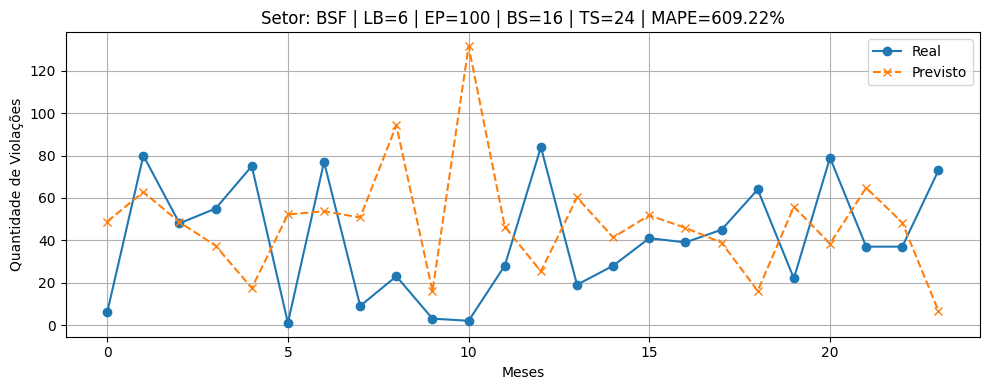

<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


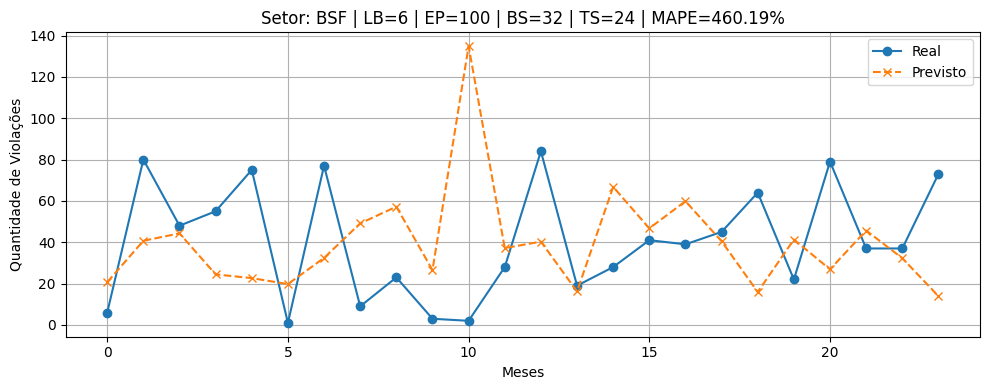

<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


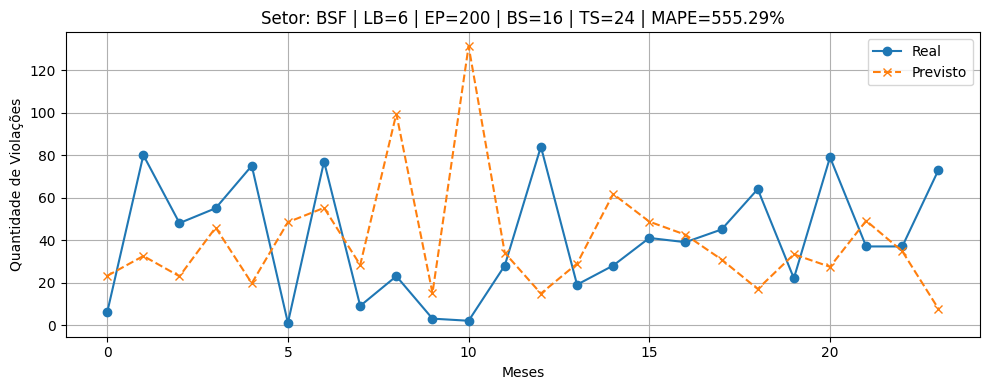

<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


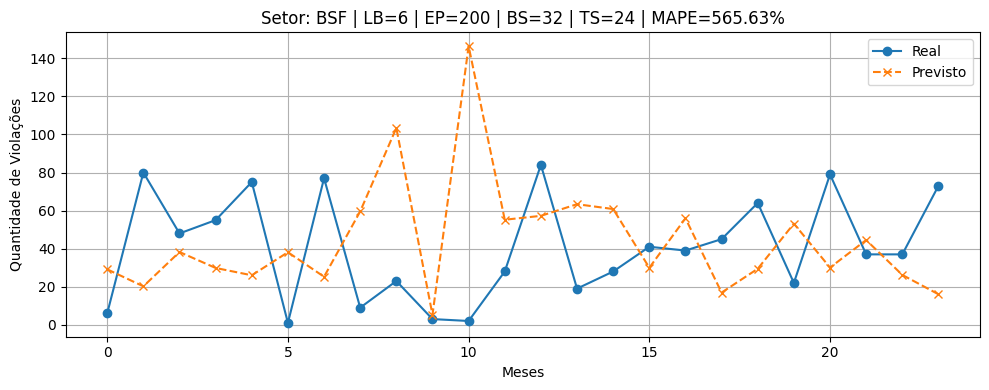

<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


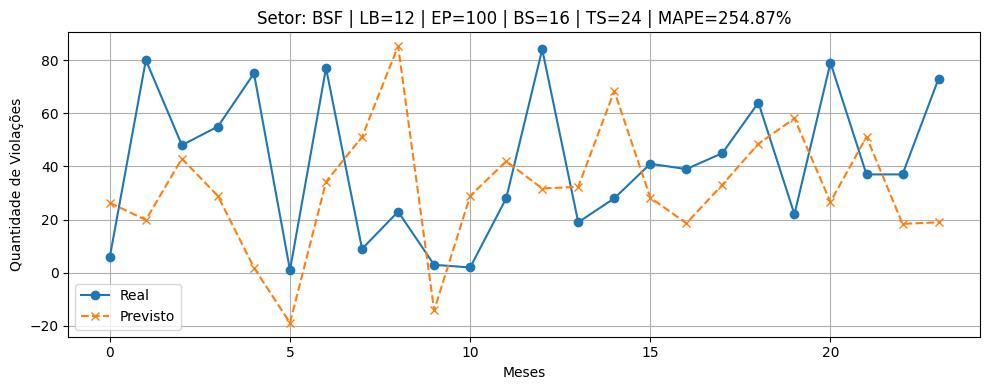

<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


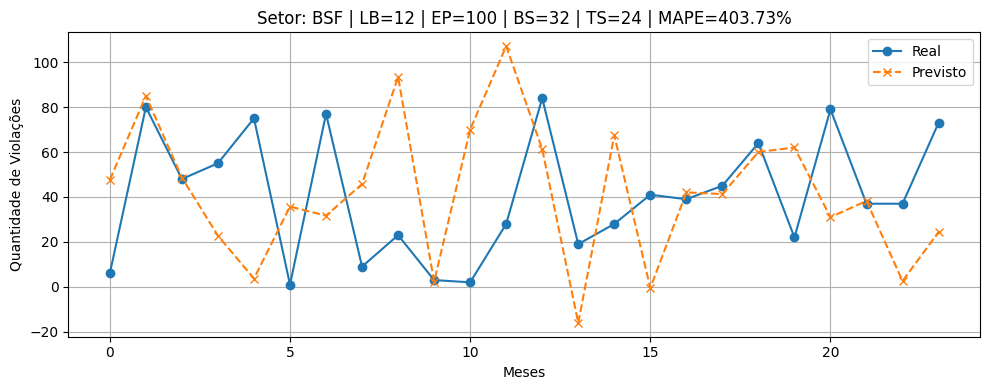

<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


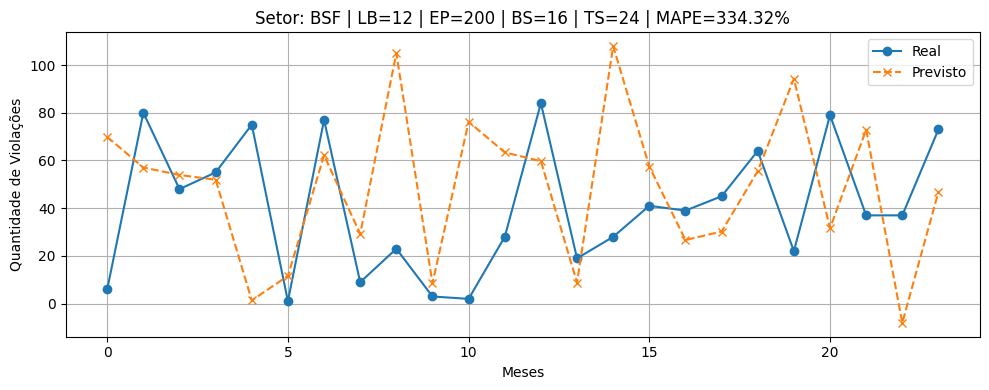

<ipython-input-7-89712513e0bd>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


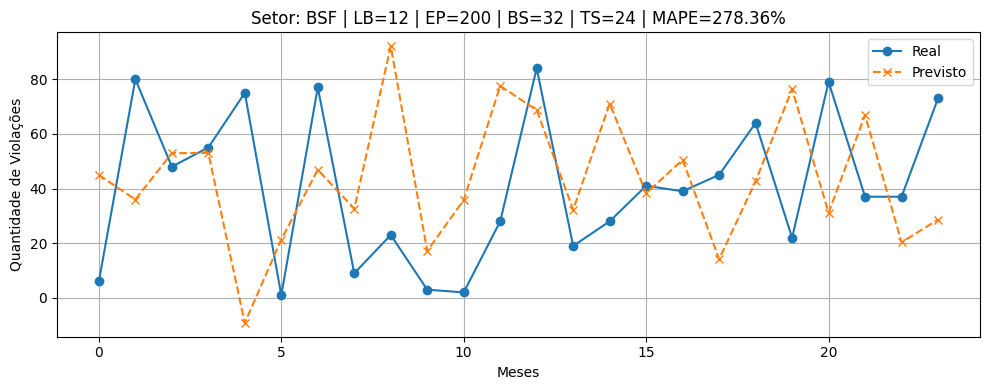

NameError: name 'df_resultados' is not defined

In [ ]:
# Recarregando bibliotecas e preparando ambiente após reset
from itertools import product
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

# Simulando DataFrame
setores = ['BSF']
dates = pd.date_range(start='2010-01-01', end='2023-12-31', freq='M')
df_original = pd.DataFrame({'Date Breach': dates})
for setor in setores:
    df_original[setor] = np.random.randint(0, 100, len(dates))

# Hiperparâmetros
look_back_values = [6, 12] #, 18]
epochs_values = [100, 200] #, 300]
batch_sizes = [16, 32] #, 64]
test_size_values = [24]
param_grid = list(product(look_back_values, epochs_values, batch_sizes, test_size_values))

results = []

# Loop por setor e combinação
for setor in setores:
    print(f"\n🚩 Iniciando grid search para setor: {setor}")
    for look_back, epochs, batch_size, test_size in param_grid:
        df = df_original.copy()
        df['Date Breach'] = pd.to_datetime(df['Date Breach'])
        df.set_index('Date Breach', inplace=True)
        df = df.resample('M').sum()
        df = df[(df.index >= pd.to_datetime('2010-01-01')) & (df.index < pd.to_datetime('2024-01-01'))]

        serie = df[[setor]].fillna(0)
        scaler = MinMaxScaler()
        serie_scaled = scaler.fit_transform(serie)

        X, y = [], []
        for i in range(len(serie_scaled) - look_back):
            X.append(serie_scaled[i:i + look_back])
            y.append(serie_scaled[i + look_back])
        X, y = np.array(X), np.array(y)

        if len(X) < test_size:
            continue

        X_train, X_test = X[:-test_size], X[-test_size:]
        y_train, y_test = y[:-test_size], y[-test_size:]
        X_train = X_train.reshape(X_train.shape[0], look_back, 1)
        X_test = X_test.reshape(X_test.shape[0], look_back, 1)

        model = Sequential()
        model.add(TCN(input_shape=(look_back, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        y_pred_scaled = model.predict(X_test)
        y_pred = scaler.inverse_transform(y_pred_scaled)
        y_real = scaler.inverse_transform(y_test)

        mae = mean_absolute_error(y_real, y_pred)
        rmse = np.sqrt(mean_squared_error(y_real, y_pred))
        mape = np.mean(np.abs((y_real[y_real != 0] - y_pred[y_real != 0]) / y_real[y_real != 0])) * 100

        results.append({
            'setor': setor,
            'look_back': look_back,
            'epochs': epochs,
            'batch_size': batch_size,
            'test_size': test_size,
            'mae': mae,
            'rmse': rmse,
            'mape': mape
        })

        # Gráfico com MAPE no título
        plt.figure(figsize=(10, 4))
        plt.plot(y_real, marker='o', label='Real')
        plt.plot(y_pred, marker='x', linestyle='--', label='Previsto')
        plt.title(f'Setor: {setor} | LB={look_back} | EP={epochs} | BS={batch_size} | TS={test_size} | MAPE={mape:.2f}%')
        plt.xlabel('Meses')
        plt.ylabel('Quantidade de Violações')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Exibir DataFrame com resultados formatados
df_resultados_formatado = df_resultados.copy()
df_resultados_formatado[['mae', 'rmse', 'mape']] = df_resultados_formatado[['mae', 'rmse', 'mape']].applymap(lambda x: round(x, 2))

print(df_resultados_formatado)





In [ ]:
# Também salva o CSV já formatado, se quiser
df_resultados_formatado.to_csv('resultados_grid_search_tcn.csv', index=False)